In [206]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pathXtrain = os.getcwd() + '\TestSet\X.csv'

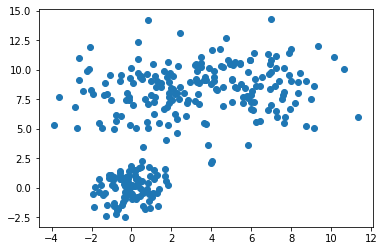

In [207]:
X = pd.read_csv(pathXtrain, header=None)
#X.insert(loc=0, column='b', value=1)
X.columns = ["x", "y"]
x = np.array(X)
#Xinv = X[["b","x1","x2"]]
plt.scatter(X["x"], X["y"])

In [234]:
n = X.shape[0]
d = X.shape[1]
K = 3

K Means

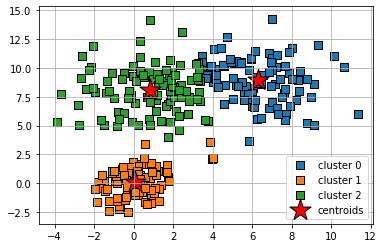

In [235]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=K)
km.fit(np.array(x))
km.predict([[6, 5]])
# plot the K clusters
for k in range(K):
    # plot the k-th clusters
    plt.scatter(
        x[km.labels_ == k, 0], x[km.labels_ == k, 1],
        s=50, c="C"+str(k),
        marker='s', edgecolor='black',
        label='cluster '+str(k)
    )
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=500, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Expectation Max for Gaussian Mixture Model

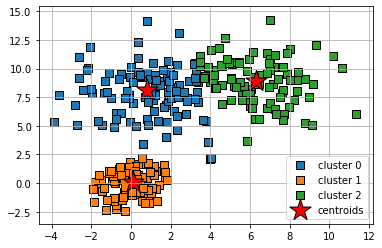

In [236]:
from sklearn.mixture import GaussianMixture
emGmm = GaussianMixture(n_components=K)
emGmm.fit(x)
y_clustered = emGmm.predict(x)
emGmm.means_
emGmm.covariances_
# plot the K clusters
for k in range(K):
    # plot the k-th clusters
    plt.scatter(
        x[y_clustered == k, 0], x[y_clustered == k, 1],
        s=50, c="C"+str(k),
        marker='s', edgecolor='black',
        label='cluster '+str(k)
    )
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=500, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

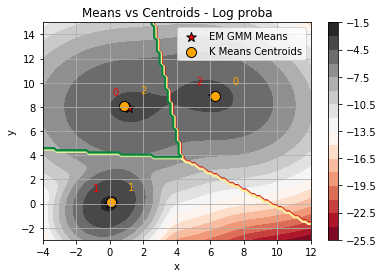

In [331]:
#Compare Means-Centroids
fig, ax = plt.subplots(1,1)

Nsmpl = 100
X, Y = np.meshgrid(np.linspace(-4, 12,Nsmpl), np.linspace(-3,15,Nsmpl)) #X and Y axis and their limits
XX = np.array([X.ravel(), Y.ravel()]).T #flatten all points into lines of single matrix

#Show variances
Z = emGmm.score_samples(XX) #Weighted log_probability for each point
Z = Z.reshape((Nsmpl,Nsmpl))
cp = plt.contourf(X, Y, Z, 20, cmap='RdGy')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Means vs Centroids - Log proba')
ax.set_xlabel('x')
ax.set_ylabel('y')
#plt.scatter(x[:, 0], x[:, 1])

#Draw K Means boundaries
predictedClusters = km.predict(XX)
predictedClusters = predictedClusters.reshape((Nsmpl,Nsmpl))
plt.contour(X, Y, predictedClusters, 20, cmap='RdYlGn')

#Show Means and centroids
plt.scatter(
    emGmm.means_[:, 0], emGmm.means_[:, 1],
    s=100, marker='*',
    c='red', edgecolor='black',
    label='EM GMM Means'
)
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=100, marker='o',
    c='orange', edgecolor='black',
    label='K Means Centroids'
)
plt.legend(scatterpoints=1)
plt.grid()

for k in range(K):
    plt.text(emGmm.means_[k, 0]-1, emGmm.means_[k, 1]+1, str(k), c="red")
    plt.text(km.cluster_centers_[k, 0]+1, km.cluster_centers_[k, 1]+1, str(k), c="orange")


plt.show()

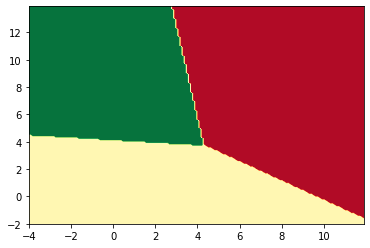

In [330]:
xplt, yplt = np.mgrid[-4:12:.1, -2:14:.1]
XX = np.array([xplt.ravel(), yplt.ravel()]).T
predictedClusters = km.predict(XX)
predictedClusters = predictedClusters.reshape(xplt.shape[0], xplt.shape[0])

plt.contourf(xplt, yplt, predictedClusters, 20, cmap='RdYlGn')

In [249]:
#Covariance matrices
emGmm.covariances_

array([[[ 4.48180897, -0.09263105],
        [-0.09263105,  4.53660531]],

       [[ 0.7247555 ,  0.17066724],
        [ 0.17066724,  1.16020178]],

       [[ 3.80800358, -0.61171687],
        [-0.61171687,  3.70021762]]])

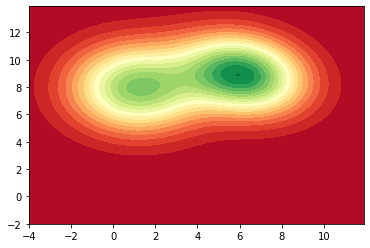

In [296]:
from scipy.stats import multivariate_normal
xplt, yplt = np.mgrid[-4:12:.1, -2:14:.1]
pos = np.empty(xplt.shape + (2,))
pos[:, :, 0] = xplt
pos[:, :, 1] = yplt

k = 2
mean = emGmm.means_[k]
cov = emGmm.covariances_[k]
prbd = multivariate_normal(mean, cov)
proba = prbd.pdf(pos)

k = 0
mean = emGmm.means_[k]
cov = emGmm.covariances_[k]
prbd = multivariate_normal(mean, cov)
proba += prbd.pdf(pos)

plt.contourf(xplt, yplt, proba, 20, cmap='RdYlGn')

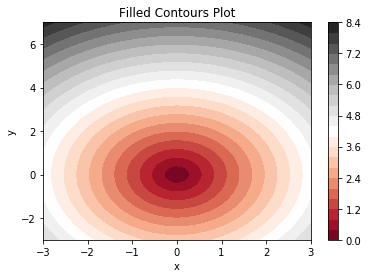

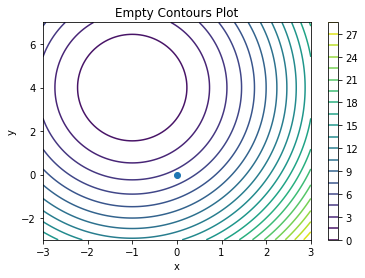

In [232]:
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 7.0, 100)
X, Y = np.meshgrid(xlist, ylist)

Z1 = np.sqrt(2*X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z1, 20, cmap='RdGy')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

Z2 = (X+1)**2 + (0.5*Y-2)**2
fig,ax2=plt.subplots(1,1)
cp = ax2.contour(X, Y, Z2, 20)
fig.colorbar(cp) # Add a colorbar to a plot
ax2.set_title('Empty Contours Plot')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.scatter(0,0)
plt.show()